# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Endritha Pramudya
- **Email:** endrithapramudya834@gmail.com
- **ID Dicoding:** endritha

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana tren pengguna pada beberapa tahun?
- Pertanyaan 2 : Bagaimana pengaruh musim pada jumlah penggunaan sepeda?
- Pertanyaan 3 : Bagaimana pengaruh jenis cuaca (cerah, hujan, berawan) pada penggunaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# memuat data csv hour

df = pd.read_csv('dataset/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

##### Memeriksa data type dari tiap kolom

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


##### Memeriksa missing value

In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value pada data

##### Memeriksa duplikasi data

In [5]:
print("Jumlah duplikasi: ",df.duplicated().sum())


Jumlah duplikasi:  0


Tidak ada duplikasi 

##### Memeriksa Parameter Statistika

In [6]:
df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


### Cleaning Data

In [7]:
# konversi ke date data type
df['dteday']=pd.to_datetime(df['dteday'])
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [8]:
# menemukan hari dari setiap tanggal
df['weekday'] = df['dteday'].dt.day_name()
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# menemukan bulan dari setiap tanggal
df['mnth']=df['dteday'].dt.month_name()
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
# mengganti nilai integer season
def find_season(season):
    seasons = {
        1: "Springer",
        2: "Summer",
        3: "Fall",
        4: "Winter"
    }

    return seasons.get(season)

df["season"] = df["season"].apply(find_season)

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
# menyesuaikan tahun, 2011 jika 0, 2012 jika 1
df['yr']=df['dteday'].dt.year
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [12]:
# menyimpan data yang telah dibersihkan menjadi file csv
df.to_csv("cleaned_hour.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int32
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [15]:
df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14955,14956,2012-09-20,Fall,2012,September,8,0,Thursday,1,1,0.50,0.4848,0.68,0.0896,44,746,790
5558,5559,2011-08-24,Fall,2011,August,12,0,Wednesday,1,1,0.74,0.6818,0.55,0.3284,60,175,235
2115,2116,2011-04-03,Summer,2011,April,0,0,Sunday,0,1,0.30,0.2879,0.65,0.1940,8,31,39
10791,10792,2012-03-30,Summer,2012,March,18,0,Friday,1,1,0.42,0.4242,0.54,0.1940,68,492,560
10059,10060,2012-02-29,Springer,2012,February,5,0,Wednesday,1,1,0.26,0.2879,0.75,0.0896,0,29,29


In [16]:
# preferensi sewa berdasarkan yr dan season

df.groupby(by=["yr", "season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr   season                              
2011 Fall       95450      324200  419650
     Springer   21425      128575  150000
     Summer     77564      269752  347316
     Winter     52813      273324  326137
2012 Fall      130641      510838  641479
     Springer   39197      282151  321348
     Summer    125958      445315  571273
     Winter     76969      438507  515476

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana trend pengguna dalam beberapa tahun?


In [17]:
monthly_bikesharing_df = df.resample(rule="M", on="dteday").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

monthly_bikesharing_df.index=monthly_bikesharing_df.index.strftime('%b-%y')
monthly_bikesharing_df=monthly_bikesharing_df.reset_index()
monthly_bikesharing_df.rename(columns={
    "dteday": "dateyears"
}, inplace=True)
monthly_bikesharing_df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5676\1772607472.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_bikesharing_df = df.resample(rule="M", on="dteday").agg({


,dateyears,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


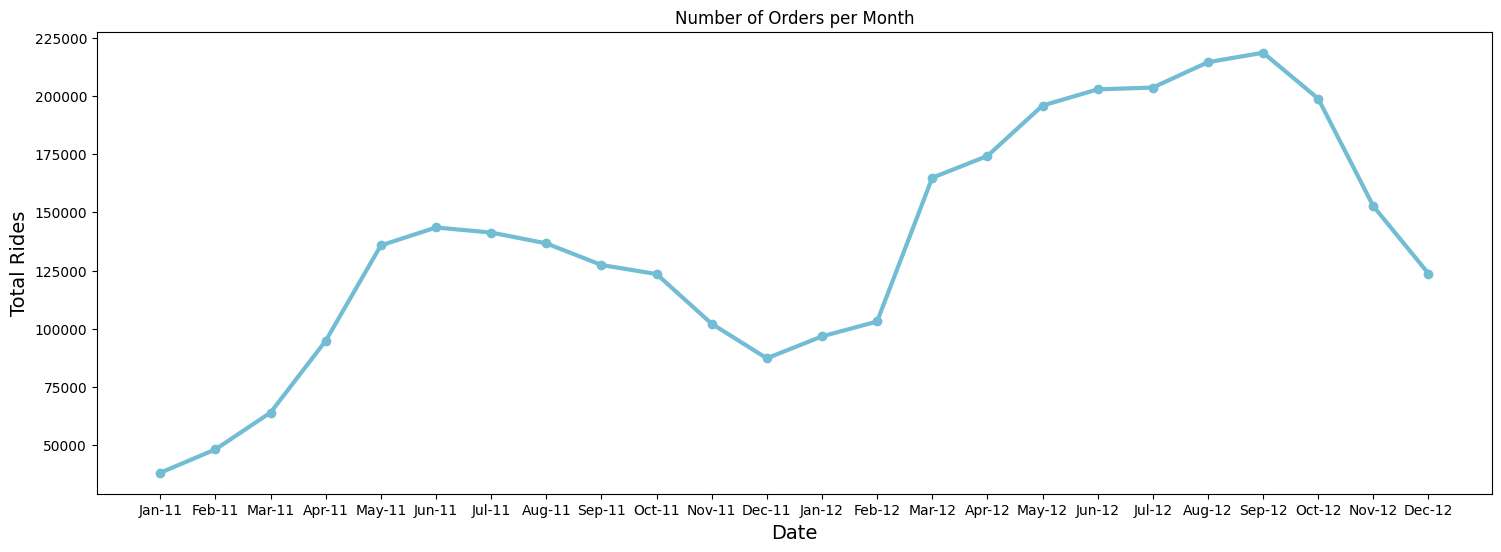

In [18]:
plt.figure(figsize=(18,6)) 
plt.plot(monthly_bikesharing_df["dateyears"], monthly_bikesharing_df["cnt"], marker='o', linewidth=3, color="#72BCD4") 
plt.title("Number of Orders per Month", loc="center") 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)
plt.show()

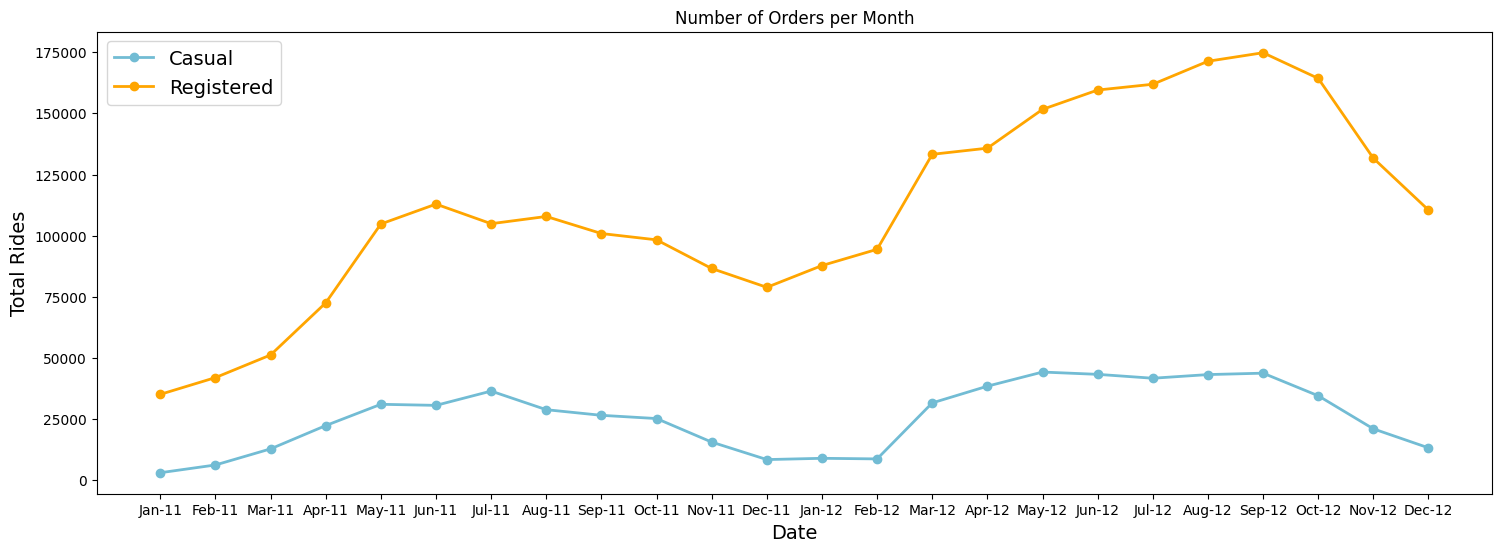

In [19]:
plt.figure(figsize=(18,6)) 
plt.plot(monthly_bikesharing_df["dateyears"], monthly_bikesharing_df["casual"], marker='o', linewidth=2, color="#72BCD4",label="Casual")
plt.plot(monthly_bikesharing_df["dateyears"], monthly_bikesharing_df["registered"], marker='o', linewidth=2, color="#FFA500",label="Registered") 
plt.title("Number of Orders per Month", loc="center") 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.xlabel("Date", fontsize=14)
plt.ylabel("Total Rides", fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.show()

Dari tabel di atas dapat diketahui 
- Jumlah pengguna pada pertengahan tahun 2011 turun hingga awal 2012 lalu kembali naik pada bulan maret dan akhirnya turun dari bulan oktober 2012 hingga akhir tahun 2012
- Jumlah pengguna pada tahun 2012 lebih banyak dari tahun 2011
- Jumlah pengguna registered lebih banyak dari casual 

### Pertanyaan 2: Bagaimana pengaruh musim pada jumlah Penggunaan sepeda?

In [20]:
seasonly_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
seasonly_df.head()

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Springer,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [21]:
seasonly_users_df = seasonly_df.reset_index()
seasonly_users_df

,season,casual,registered,cnt
0,Fall,226091,835038,1061129
1,Springer,60622,410726,471348
2,Summer,203522,715067,918589
3,Winter,129782,711831,841613


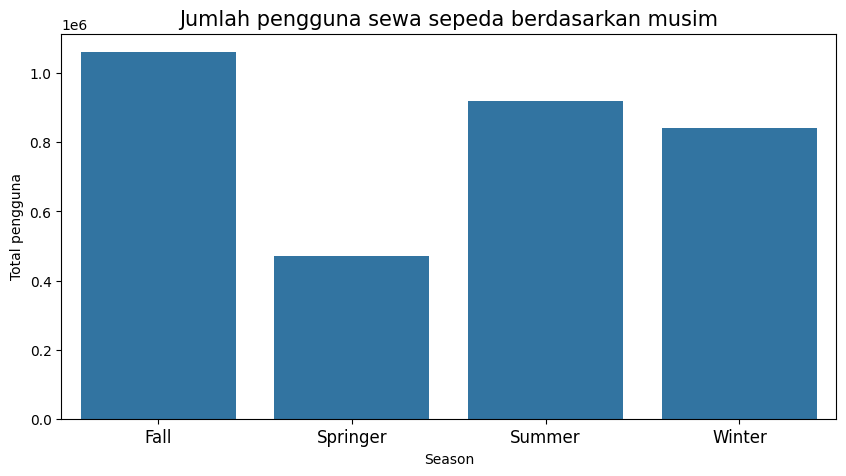

In [22]:
plt.figure(figsize=(10, 5))
sns.barplot(x="season", y="cnt",data=seasonly_df)
plt.title("Jumlah pengguna sewa sepeda berdasarkan musim", loc="center", fontsize=15)
plt.ylabel("Total pengguna")
plt.xlabel("Season")
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [23]:
seasonly_df = df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
})

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Fall'),
  Text(1, 0, 'Springer'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Winter')])

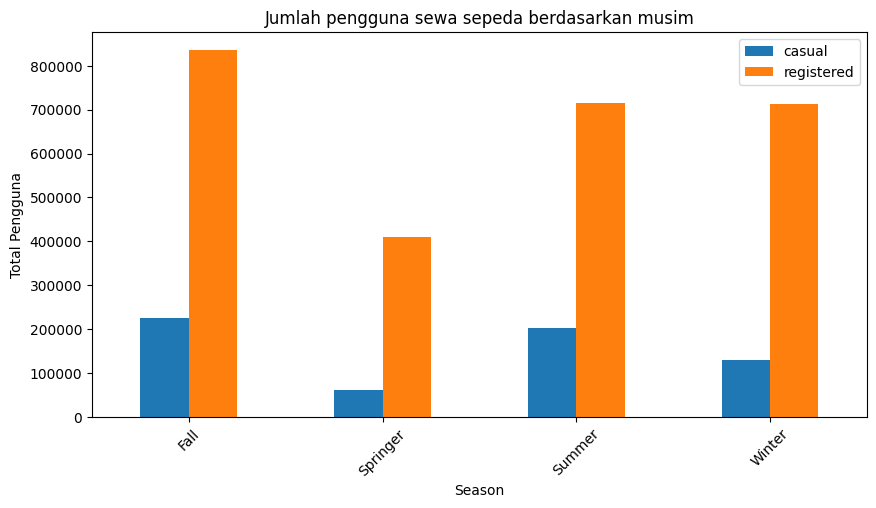

In [24]:
seasonly_df.plot(kind="bar",figsize=(10, 5))
plt.title("Jumlah pengguna sewa sepeda berdasarkan musim")
plt.xlabel("Season")
plt.ylabel("Total Pengguna")
plt.xticks(rotation=45)

- Jumlah tertinggi terjadi pada musim gugur/fall dan terendah pada musim semi/springer
- Tidak ada perbedaan signifikan antara Casual dan Registered, keduanya sama-sama tertinggi pada musim gugur dan terendah pada musim semi.

### Pertanyaan 3: Bagaimana pengaruh jenis cuaca pada jumlah penggunaan sepeda?
weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [25]:
weathersit_df = df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
weathersit_df

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


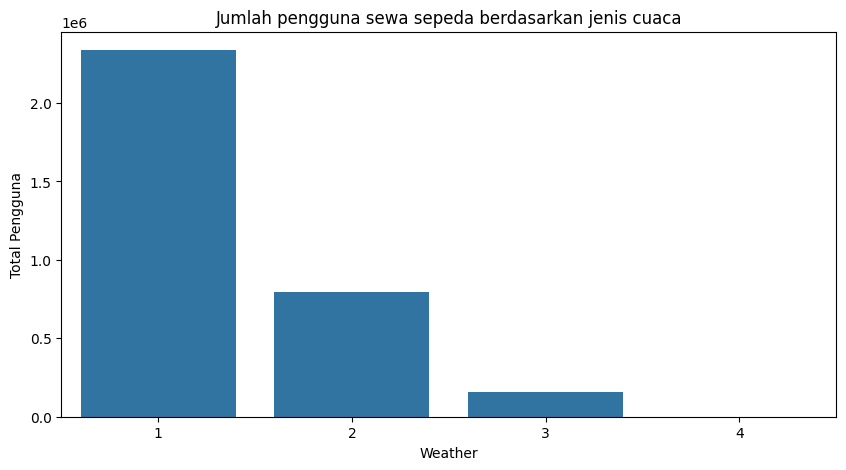

In [26]:
plt.figure(figsize=(10, 5))
sns.barplot(x="weathersit", y="cnt", data=weathersit_df)
plt.xlabel("Weather")
plt.ylabel("Total Pengguna")
plt.title("Jumlah pengguna sewa sepeda berdasarkan jenis cuaca")

plt.show()

- jumlah penggunaan pada cuaca 1 lebih banyak dibandingkan cuaca lainnya dengan selisih yang lumayan jauh. 

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2